In [88]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [89]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, random_state=41, n_classes=2, 
                           class_sep=20, hypercube=False, n_clusters_per_class=1, n_redundant=0)

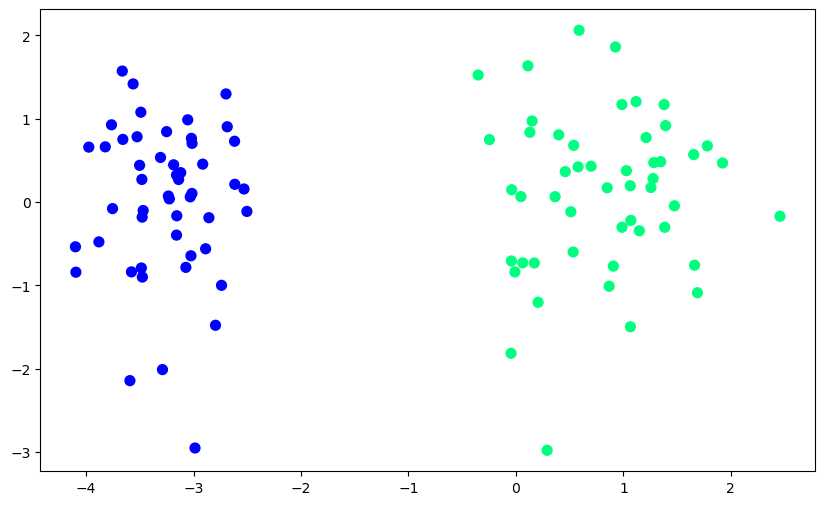

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=50)

In [91]:
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X, y)

C:\Users\12368\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [92]:
print(lor.coef_)
print(lor.intercept_)

[[4.88835074 0.23351761]]
[5.84974966]


In [93]:
lor.intercept_[0]

5.849749657267959

In [94]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [95]:
b1

array([-25.05057226])

In [96]:
x_input = np.linspace(-3, 3, 100) # create an evenly space array of 100 float points between -3 and 3
y_input = m1 * x_input + b1

In [97]:
np.linspace(-3, 3, 100)

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [98]:
def GD(X,y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(3000):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr * np.dot((y-y_hat), X/X.shape[0])

    return weights[1: ], weights[0]

In [99]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [100]:
coef_, intercept_ = GD(X, y)

In [101]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [102]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

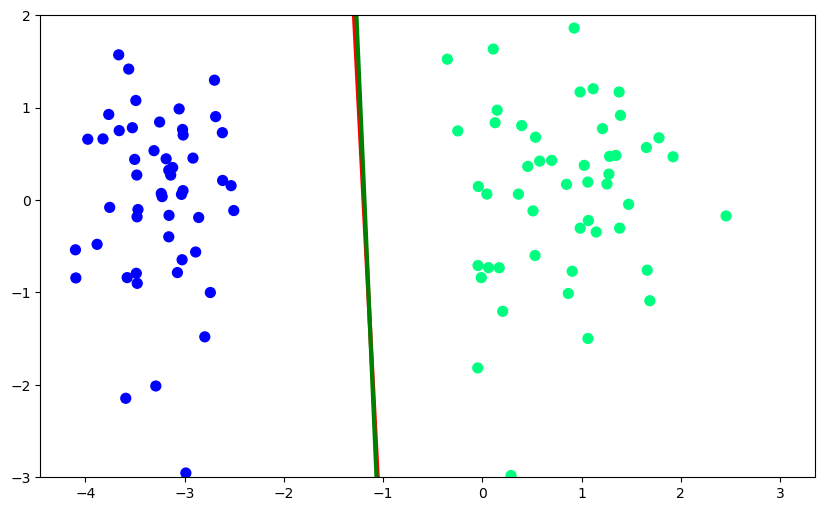

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='green', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=50)
plt.ylim(-3,2)